In [9]:
# rishav anand 11-11-2023

In [35]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version =1,parser = 'auto')
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
X,y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [12]:
X.shape

(70000, 784)

In [13]:
y.shape

(70000,)

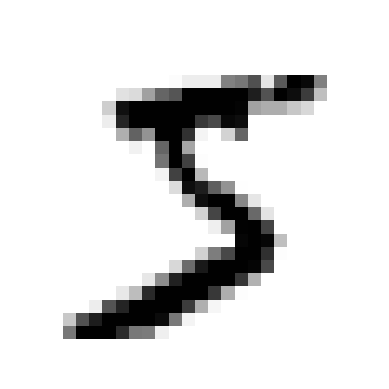

In [14]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image,cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis("off")
plt.show()

In [15]:
y[0]

'5'

# Spliting Data 

In [16]:
X_train,X_test ,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

# Training A Binary Classifier

In [24]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits.
y_test_5 = (y_test == '5')

In [25]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([some_digit])

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Performance Measure

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [31]:
from sklearn.base import BaseEstimator
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype =bool)

In [32]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

# Confusion Matrix

In [33]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [34]:
# now using the confusion matrix function 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])